In [2]:
import pandas as pd
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,$5.36,NaN
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,$8.32,NaN
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,$3.73,20.0
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,$3.70,20.0
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,$9.24,20.0


In [4]:
df.tax.fillna(0, inplace=True)

In [5]:
df["Full_name"] = df.first_name + ' ' + df.last_name
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax,Full_name
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,$5.36,0.0,Marylin Alders
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,$8.32,0.0,Hinda Harridge
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,$3.73,20.0,Erl Kilminster
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,$3.70,20.0,Grata Brantl
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,$9.24,20.0,Kanya Beasant
...,...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,$3.63,0.0,Duff Errigo
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,NaN,$4.59,20.0,Ame Rastall
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,$7.54,20.0,Betty Stickels
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,$5.81,0.0,Paquito Tesoe


In [6]:
df.drop(["email", "ip_address", "first_name", "last_name"], axis=1, inplace=True)

In [7]:
del df['id']

In [8]:
df.isnull().sum()

date           0
gender        69
country       44
price_paid     0
tax            0
Full_name      0
dtype: int64

In [9]:
df.dropna(subset=["country", "gender"], inplace=True)

In [10]:
df.price_paid = df.price_paid.apply(lambda x : float(x.replace("$", "")))


In [11]:
df["product_price"] = df.price_paid * ( 1 - df.tax / 100)
df

,date,gender,country,price_paid,tax,Full_name,product_price
0,03/28/2021,Male,Canada,5.36,0.0,Marylin Alders,5.360
1,03/19/2021,Female,Canada,8.32,0.0,Hinda Harridge,8.320
2,03/17/2021,Male,United States,3.73,20.0,Erl Kilminster,2.984
3,03/19/2021,Female,United States,3.70,20.0,Grata Brantl,2.960
4,03/24/2021,Male,Morocco,9.24,20.0,Kanya Beasant,7.392
...,...,...,...,...,...,...,...
993,03/22/2021,Male,France,4.31,0.0,Ossie Snelle,4.310
994,03/17/2021,Female,France,5.68,20.0,Carolyne Bruntjen,4.544
995,03/24/2021,Female,France,3.63,0.0,Duff Errigo,3.630
997,03/13/2021,Male,United States,7.54,20.0,Betty Stickels,6.032


In [12]:
df = df[["Full_name", "gender", "country", "date", "product_price", "tax", "price_paid"]]
df

,Full_name,gender,country,date,product_price,tax,price_paid
0,Marylin Alders,Male,Canada,03/28/2021,5.360,0.0,5.36
1,Hinda Harridge,Female,Canada,03/19/2021,8.320,0.0,8.32
2,Erl Kilminster,Male,United States,03/17/2021,2.984,20.0,3.73
3,Grata Brantl,Female,United States,03/19/2021,2.960,20.0,3.70
4,Kanya Beasant,Male,Morocco,03/24/2021,7.392,20.0,9.24
...,...,...,...,...,...,...,...
993,Ossie Snelle,Male,France,03/22/2021,4.310,0.0,4.31
994,Carolyne Bruntjen,Female,France,03/17/2021,4.544,20.0,5.68
995,Duff Errigo,Female,France,03/24/2021,3.630,0.0,3.63
997,Betty Stickels,Male,United States,03/13/2021,6.032,20.0,7.54


In [13]:
df.to_csv('cleaned_data.csv', index=False)

<AxesSubplot:xlabel='date'>

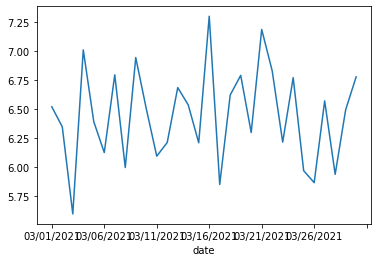

In [14]:
df.groupby("date")["price_paid"].mean().plot(figzise = )

<AxesSubplot:ylabel='price_paid'>

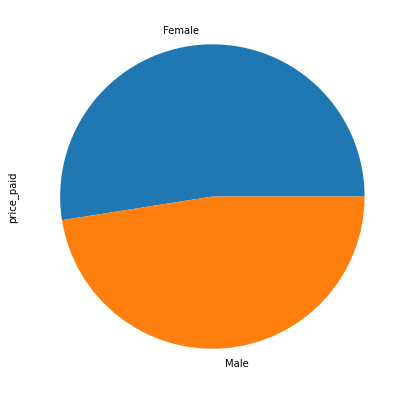

In [25]:

df.groupby("gender")["price_paid"].sum().plot.pie(figsize=(7,7))

<AxesSubplot:xlabel='country'>

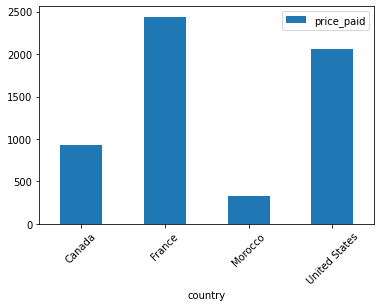

In [24]:
df.groupby("country")["price_paid"].sum().plot.bar(rot=45, legend=True )